In [73]:
from arcgis.gis import GIS
from IPython.display import display
gis = GIS("home")

In [74]:
fmSearch = gis.content.search(query="title:Farmers Markets in Alameda County",item_type="Feature Layer")
fmSearch

[<Item title:"Farmers Markets in Alameda County 3" type:Feature Layer Collection owner:billparkermapping>]

<Item title:"Farmers Markets in Alameda County 3" type:Feature Layer Collection owner:billparkermapping>
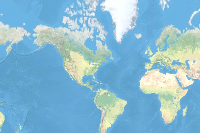

In [75]:
farmersMarkets = fmSearch[0]
farmersMarkets

In [76]:
fmLayers = farmersMarkets.layers
for layer in fmLayers:
    display(layer.properties.name)

'Farmers_Markets_in_Alameda_County_3'

In [77]:
alamedaFM = fmLayers[0]
print(alamedaFM.properties.geometryType)
print(alamedaFM.properties.type)
print(alamedaFM.properties.fields)

esriGeometryPoint
Feature Layer
[{
  "name": "MarketName",
  "type": "esriFieldTypeString",
  "actualType": "nvarchar",
  "alias": "MarketName",
  "sqlType": "sqlTypeNVarchar",
  "length": 4000,
  "nullable": true,
  "editable": true,
  "domain": null,
  "defaultValue": null
}, {
  "name": "Days",
  "type": "esriFieldTypeString",
  "actualType": "nvarchar",
  "alias": "Days",
  "sqlType": "sqlTypeNVarchar",
  "length": 4000,
  "nullable": true,
  "editable": true,
  "domain": null,
  "defaultValue": null
}, {
  "name": "Time",
  "type": "esriFieldTypeString",
  "actualType": "nvarchar",
  "alias": "Time",
  "sqlType": "sqlTypeNVarchar",
  "length": 256,
  "nullable": true,
  "editable": true,
  "domain": null,
  "defaultValue": null
}, {
  "name": "Location",
  "type": "esriFieldTypeString",
  "actualType": "nvarchar",
  "alias": "Location",
  "sqlType": "sqlTypeNVarchar",
  "length": 4000,
  "nullable": true,
  "editable": true,
  "domain": null,
  "defaultValue": null
}, {
  "name": 

In [78]:
oaklandFM = alamedaFM.query(where="City='Oakland'")
oaklandFM

<FeatureSet> 8 features

In [79]:
i = 0
while i < len(oaklandFM):
    print(oaklandFM.features[i].geometry)
    i+=1

{'x': -13608573.86722754, 'y': 4552721.437081691, 'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}
{'x': -13611486.986982107, 'y': 4551375.895114394, 'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}
{'x': -13611589.066955162, 'y': 4550342.270726181, 'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}
{'x': -13609863.058250414, 'y': 4556834.097640283, 'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}
{'x': -13610357.87338699, 'y': 4556135.949734949, 'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}
{'x': -13605919.899247535, 'y': 4547816.049716471, 'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}
{'x': -13600459.678224126, 'y': 4546891.35396034, 'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}
{'x': -13604305.098714089, 'y': 4554978.39327759, 'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}


In [80]:
i = 0
while i < len(oaklandFM):
    print(oaklandFM.features[i].attributes)
    i+=1

{'MarketName': 'Grand Lake ', 'Days': 'Saturday', 'Time': '9 am - 2 pm', 'Location': 'Splash Pad Park', 'City': 'Oakland', 'Latitude': 37.810721, 'Longitude': -122.247899, 'ObjectId': 4}
{'MarketName': 'Old Oakland', 'Days': 'Friday', 'Time': '8 am - 2 pm', 'Location': '9th St and Broadway', 'City': 'Oakland', 'Latitude': 37.801171, 'Longitude': -122.274068, 'ObjectId': 5}
{'MarketName': 'Jack London Square', 'Days': 'Sunday', 'Time': '9 am - 2 pm', 'Location': '44 Webster St', 'City': 'Oakland', 'Latitude': 37.793834, 'Longitude': -122.274985, 'ObjectId': 6}
{'MarketName': 'Temescal Farmers Market', 'Days': 'Sunday', 'Time': '9 am - 1 pm', 'Location': '5300 Claremnont Avenue', 'City': 'Oakland', 'Latitude': 37.839903, 'Longitude': -122.25948, 'ObjectId': 7}
{'MarketName': 'BeetBox CSA', 'Days': 'Wednesday', 'Time': '2 pm - 6 pm', 'Location': '4799 Shattuck Avenue', 'City': 'Oakland', 'Latitude': 37.83495, 'Longitude': -122.263925, 'ObjectId': 8}
{'MarketName': 'Fruitvale Farmers Marke

In [155]:
alamedaFM.properties.capabilities

'Create,Delete,Query,Update,Editing'

In [156]:
oakFM_features = oaklandFM

In [161]:
fmFeature =[]
for f in oakFM_features:
    print(f.attributes["Location"])
    if "St" in f.attributes["Location"]:
        fmFeature.append(f)
        

Splash Pad Park
9th Street and Broadway
44 Webster Street
5300 Claremnont Avenue
4799 Shattuck Avenue
Avenida de la Fuente and 12th Street
6955 Foothill Boulevard
La Salle Avenue and Mountain Bouldevard


In [168]:
featEditList = []
for feat in fmFeature:
    featEdit = feat
    featEdit.attributes["Location"] = featEdit.attributes["Location"].replace("St","Street")
    featEditList.append(featEdit)

In [169]:
featEditList

[{"geometry": {"x": -13604305.098714089, "y": 4554978.39327759, "spatialReference": {"wkid": 102100, "latestWkid": 3857}}, "attributes": {"MarketName": "Montclair Village Farmers Market", "Days": "Sunday", "Time": "9 am - 1 pm", "Location": "La Salle Avenue and Mountain Boulevard", "City": "Oakland", "Latitude": 37.826737, "Longitude": -122.209552, "ObjectId": 11}}]

In [170]:
updateFM = alamedaFM.edit_features(updates = featEditList)
updateFM

{'addResults': [], 'updateResults': [{'objectId': 11, 'uniqueId': 11, 'globalId': None, 'success': True}], 'deleteResults': []}